<div style="text-align: center;">
  <center><h2>Plot and Generate a Report for Current Analysis</h2></center>
</div>

<h2>Board: STM32 Nucleo L476RG</h2>
<h2>Author: Alexandre Nuernberg</h2>

<p>Date: 2024/06/01</p>

<p>
  
  # See: https://github.com/alexandreberg/PCAM_Performance_Tests/tree/main/Arduino_UNO_R3
</p>


# Importing Libraries

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
import locale
import os

# Configure para usar o ponto como separador decimal (por exemplo, padrão dos EUA)
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')

'en_US.UTF-8'

# Mounting your Google Drive


In [2]:
# Mounting your Google Drive
##from google.colab import drive
##drive.mount('/content/drive')

# If needed Unmount the Google Drive comment out the drive.mount linbe and uncomment the following line
#drive.flush_and_unmount() #comment if you not use

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Defining the path and file of database in CSV format

In [13]:
path = "C:\\Projetos_GitHub\\PCAM_Performance_Tests\\Sensors\\ultrasonic\\US-100_tests\\Media_Files\\test_02_5V\\"  # Certifique-se da barra no final
file = "test_02_5V.csv"

# Loading the CSV File

In [14]:
data_file = os.path.join(path, file)
print(data_file)

# Listing drive content:
#!ls -l $path

# Create the DataFrame with the csv file downloaded
df = pd.read_csv(data_file)

#Checking if the DB file exists
if os.path.exists(data_file):
    print("File exists!")
else:
    print("File does not exist!")

C:\Projetos_GitHub\PCAM_Performance_Tests\Sensors\ultrasonic\US-100_tests\Media_Files\test_02_5V\test_02_5V.csv
File exists!


In [ ]:
# You can use this method if you do not want to share your all drive folder.
# It is safer.

# Just try this method if everything is working fine with the full mount of GD which is simpler to test

# Link for de DB file: Blink_Test_4sec.csv
#file_url = 'https://drive.google.com/uc?export=download&id=1_P9UPbpq97x9oa-tUArgX6Vqqchez0Vf'

# Request to download the db file
#response = requests.get(file_url)

# Create the DataFrame with the csv file downloaded
#df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

# df = pd.read_csv(data_file) # just check if the file is there

# Splitting the "Timestamp" Column

In [4]:
# Assuming timestamps are in milliseconds
df['Timestamp(ms)'] = df['Timestamp(ms)'].astype(int)  # Convert to integers

# Since we only have milliseconds, let's create a simulated 'Date' column
# You can customize the start date if needed
df['Date'] = pd.to_datetime('2024-05-26')

# Convert timestamps from ms to datetime objects for x-axis
df['Time'] = pd.to_datetime(df['Timestamp(ms)'], unit='ms')

print(df.head())

   Timestamp(ms)  Current(uA)       Date       Time
0              0     2501.657 2024-05-26 1970-01-01
1              0     2501.657 2024-05-26 1970-01-01
2              0     2488.362 2024-05-26 1970-01-01
3              0     2492.793 2024-05-26 1970-01-01
4              0     2497.225 2024-05-26 1970-01-01


In [15]:
#Reading the first and the last data:
# Get the name of the first column (assuming your data is in a single column)
column_name = df.columns[0]

# Extract the first and last values
first_value = df[column_name].iloc[0]
last_value = df[column_name].iloc[-1]

print("First value:", first_value)
print("Last value:", last_value)

First value: 0.0
Last value: 900000.0


# Converting the current to (mA)

In [16]:
df['Current(mA)'] = df['Current(uA)'] / 1000

print(df.head())

   Timestamp(ms)  Current(uA)  Current(mA)
0           0.00     2492.793     2.492793
1           0.01     2483.931     2.483931
2           0.02     2479.501     2.479501
3           0.03     2506.090     2.506090
4           0.04     2461.786     2.461786


# Creating the Histogram

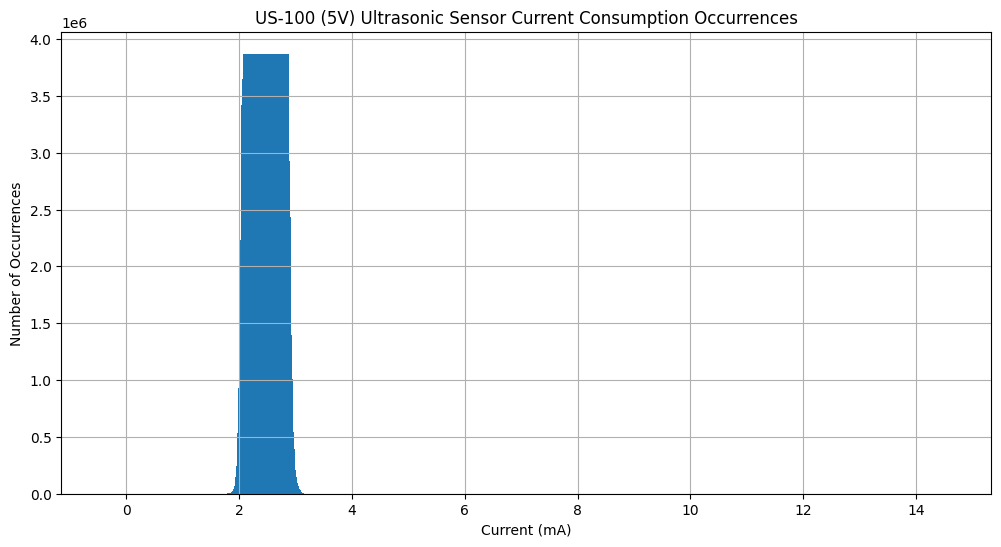

In [17]:
import matplotlib.pyplot as plt

histogram_file = "histogram.png"
fig_full_path = os.path.join(path, histogram_file)

# Create the histogram
fig, ax = plt.subplots(figsize=(12, 6))

# Group by current values and count occurrences
value_counts = df['Current(mA)'].value_counts()

# Plot the histogram
ax.bar(value_counts.index, value_counts.values)

# Customize labels and title
ax.set_xlabel('Current (mA)')
ax.set_ylabel('Number of Occurrences')
ax.set_title('US-100 (5V) Ultrasonic Sensor Current Consumption Occurrences')
ax.grid(True)

# Save the figure
fig.savefig(fig_full_path, dpi=900)


# Creating the Boxplot

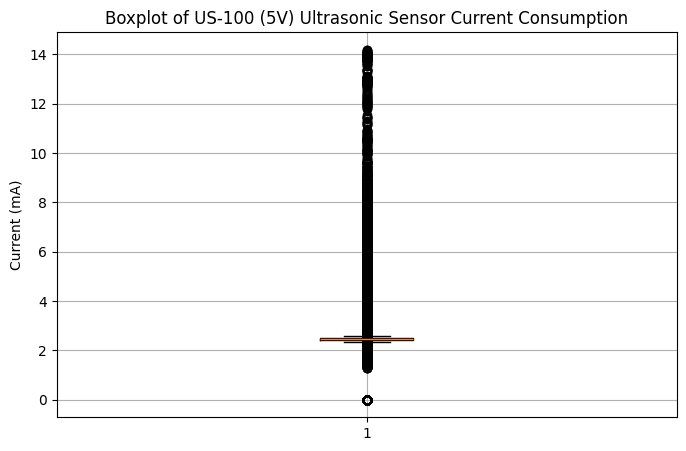

In [18]:
boxplot_file = "boxplot.png"
fig_full_path =  os.path.join(path, boxplot_file)

fig, ax = plt.subplots(figsize=(8, 5))  # Cria a figura e o subplot
plt.boxplot(df['Current(mA)'])
plt.ylabel('Current (mA)')
plt.title('Boxplot of US-100 (5V) Ultrasonic Sensor Current Consumption')
plt.grid(True)

fig.savefig(fig_full_path, dpi=900)
plt.show()  # Exibe a figura

# Creating the Line Chart

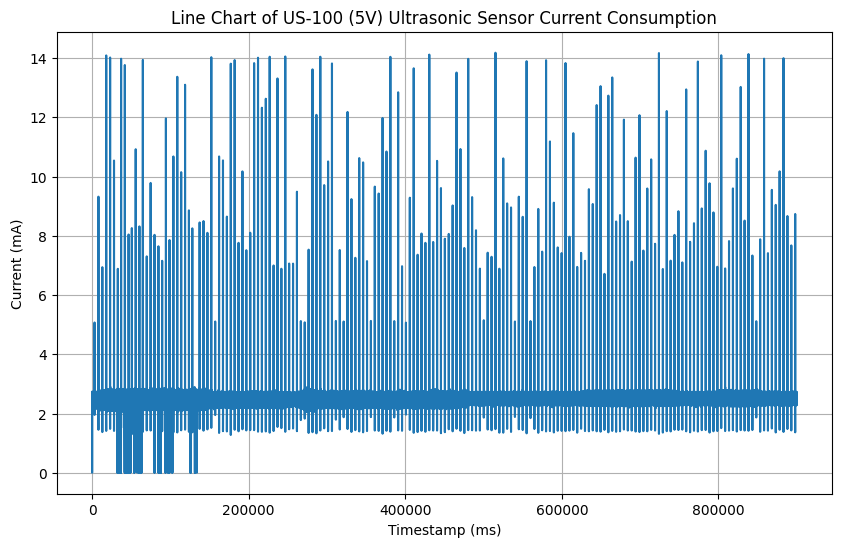

In [19]:
linechart_file = "linechart.png"
fig_full_path =  os.path.join(path, linechart_file)

fig, ax = plt.subplots(figsize=(10,6))  # Cria a figura e o subplot
#plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['Timestamp(ms)'], df['Current(mA)'])
plt.xlabel('Timestamp (ms)')
plt.ylabel('Current (mA)')
plt.title('Line Chart of US-100 (5V) Ultrasonic Sensor Current Consumption')
plt.grid(True)
# Versão com pathlib:
#fig.savefig(output_path / 'linechart.png', dpi=900)
fig.savefig(fig_full_path, dpi=900)
plt.show()


# Calculating mean and standard deviation

In [20]:
# Calculating Mean and Standard Deviation

mean_current = df['Current(uA)'].mean()
std_current = df['Current(uA)'].std()
max_current = df['Current(uA)'].max()
min_current = df['Current(uA)'].min()

# Convert to milliamperes
mean_current_mA = mean_current / 1000
std_current_mA = std_current / 1000
max_current_mA = max_current / 1000
min_current_mA = min_current / 1000

# Format with 2 decimal places and units
print("Mean Current: {:.2f} mA".format(mean_current_mA))
print("Standard Deviation of Current: {:.2f} mA".format(std_current_mA))
print("Maximum Current: {:.2f} mA".format(max_current_mA))
print("Minimum Current: {:.2f} mA".format(min_current_mA))

# Calculate the interval time of the analysis (assuming milliseconds, change if needed)
start_time = df['Timestamp(ms)'].iloc[0] / 1000
end_time = df['Timestamp(ms)'].iloc[-1] / 1000
interval_time = end_time - start_time
print("Interval Time of the Analysis: {:.2f} sec".format(interval_time ))



Mean Current: 2.47 mA
Standard Deviation of Current: 0.06 mA
Maximum Current: 14.18 mA
Minimum Current: 0.00 mA
Interval Time of the Analysis: 900.00 sec


#Storing the statistical data in a file.

In [21]:
file = 'data.txt'
file_path =  os.path.join(path, file)
# Cria a string com os dados formatados
data_content = (
    f"Mean Current: {mean_current_mA:.2f} mA\n"
    f"Standard Deviation of Current: {std_current_mA:.2f} mA\n"
    f"Maximum Current: {max_current_mA:.2f} mA\n"
    f"Minimum Current: {min_current_mA:.2f} mA\n"
    f"Interval Time of the Analysis: {interval_time:.2f} sec\n"
)

# Escreve os dados no arquivo (modo 'w' cria ou sobreescreve o arquivo)
with open(file_path, 'w') as f:
    f.write(data_content)

print("Data saved to", file_path)


Data saved to C:\Projetos_GitHub\PCAM_Performance_Tests\Sensors\ultrasonic\US-100_tests\Media_Files\test_02_5V\data.txt
